In [59]:
import sys
import nltk
from nltk.corpus import stopwords 
import pandas as pd
import json
from pandas import ExcelWriter
from pandas import ExcelFile
from nltk import word_tokenize, pos_tag
from nltk.stem.wordnet import WordNetLemmatizer
import gensim
from gensim import corpora
import string

In [64]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
#stopwords = stopwords.words("english")

[nltk_data] Downloading package stopwords to C:\Users\Rohit
[nltk_data]     Sanjay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Rohit
[nltk_data]     Sanjay\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Rohit
[nltk_data]     Sanjay\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [60]:
stopwords = stopwords.words("english")
def RemoveStopWords(text):
    words = text.split() 
    clean_words = [word for word in words if word not in stopwords] 
    clean_text = " ".join(clean_words) 
    return clean_text


In [99]:

lemma = WordNetLemmatizer()
exclude = set(string.punctuation)
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stopwords])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

In [98]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [15]:
#get all the submissions related to the medical industry
submissions=pd.read_csv('C:/Users/Rohit Sanjay/Downloads/zstd-1.4.3.tar/zstd-1.4.3/build/VS2010/bin/Win32_Debug/parsed_json_to_csv_2019_05.csv',header=None,names=["author", "category", "created_utc", "domain", "num_comments", "permalink", "score", "subreddit", "subreddit_id", "subreddit_subscribers", "title", "total_awards_received","url"])

In [142]:
#I assume that the subreddits all have soimething to do with the following root words
med_subs=submissions[submissions['subreddit'].str.contains('medici')]
doc_subs=submissions[submissions['subreddit'].str.contains('doc')]
res_subs=submissions[submissions['subreddit'].str.contains('residency')]
nurse_subs=submissions[submissions['subreddit'].str.contains('nurs')]
surgery_subs=submissions[submissions['subreddit'].str.contains('surgery')]
pharma_subs=submissions[submissions['subreddit'].str.contains('pharma')]
#df[df['ids'].str.contains('ball', na = False)] 
#df[df['ids'].str.contains('ball', na = False)] 
#df[df['ids'].str.contains('ball', na = False)] 
#df[df['ids'].str.contains('ball', na = False)] 
#df[df['ids'].str.contains('ball', na = False)] 
subtypes_s=[med_subs,doc_subs,res_subs,nurse_subs,surgery_subs]
S=pd.concat(subtypes_s)
#print(S)

In [143]:
nhs = pd.read_excel('C:/Users/Rohit Sanjay/Downloads/nhs.xlsx', sheet_name='Sheet1')

Token_list=[]
doc_complete = []
#print(nhs.Text[6])
for i,row in nhs.iterrows():
    row['Text']=RemoveStopWords(row['Text'])
    doc_complete.append( row['Text'])
    
for i,row in nhs.iterrows():
    temp=word_tokenize(row['Text'])
    Token_list.append(temp)
#print(Token_list[1])


C:\Users\Rohit Sanjay\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\Rohit Sanjay\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\Rohit Sanjay\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\Rohit Sanjay\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\Rohit Sanjay\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)


In [144]:
doc_clean = [clean(doc).split() for doc in doc_complete]  
#print(doc_clean)
dictionary = corpora.Dictionary(doc_clean)
#doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
#print(doc_term_matrix)
#Lda = gensim.models.ldamodel.LdaModel
#ldamodel = Lda(doc_term_matrix, num_topics=25, id2word = dictionary, passes=50)
#print(ldamodel.print_topics(num_topics=49, num_words=5))

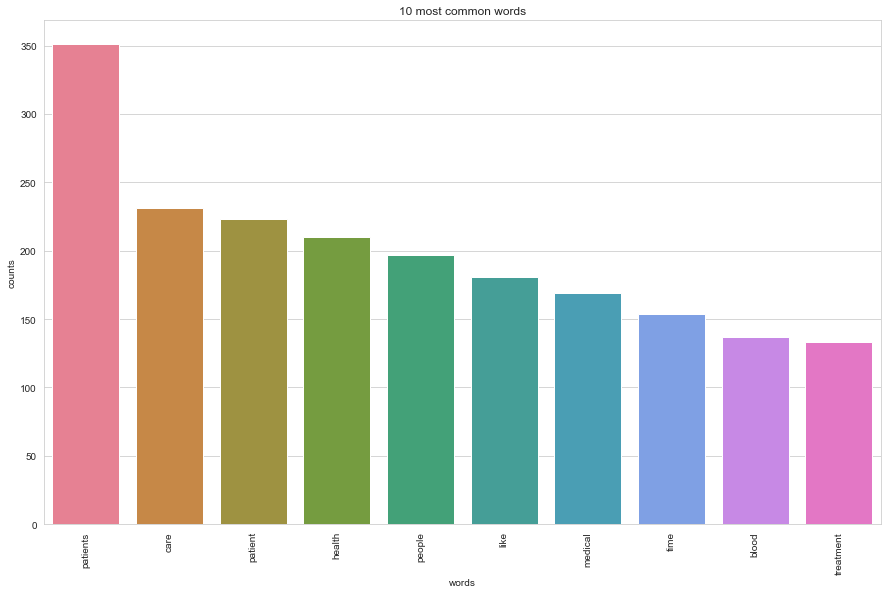

In [78]:
#to plot most common 10 terms
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(nhs['Text'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [145]:
from gensim.utils import simple_preprocess
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
#data = papers.paper_text_processed.values.tolist()
data_words = list(sent_to_words(doc_clean))
#print(data_words[:1])

In [146]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [147]:
# NLTK Stop words
# import nltk
# nltk.download('stopwords')
#from nltk.corpus import stopwords
#stop_words = stopwords.words('english')
stopwords.extend(['from', 'subject', 're', 'edu', 'use'])
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stopwords] for doc in texts]
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
#nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [151]:
import spacy
import en_core_web_sm
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = en_core_web_sm.load(disable=['parser', 'ner'])
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
#print(data_lemmatized[:1])



[['abdominal', 'swell', 'aorta', 'main', 'blood', 'vessel', 'run', 'heart', 'chest', 'tummy']]


In [165]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
# Create Corpus
texts = data_lemmatized
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)]]


In [181]:
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=12, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=5,
                                       alpha=0.91,
                                       eta=0.61,
                                       per_word_topics=True)

from pprint import pprint
# Print the Keyword in the 10 topics
#pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]
#print(doc_lda)

In [182]:
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.32077009555614444


In [156]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b,
                                           per_word_topics=True)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [161]:
import numpy as np
import tqdm
grid = {}
grid['Validation_Set'] = {}
# Topics range
min_topics = 2
max_topics = 50
step_size = 1
topics_range = range(min_topics, max_topics, step_size)
# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')
# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')
# Validation sets
num_of_docs = len(corpus)
#corpus_sets = [# gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25), 
 #              # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5), 
  #             gensim.utils.ClippedCorpus(corpus, num_of_docs*0.75), 
   #            corpus]
corpus_sets = [gensim.utils.ClippedCorpus(corpus, num_of_docs*0.75), 
               corpus]
print(corpus_sets)
corpus_title = ['75% Corpus', '100% Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=540)
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()

[<gensim.utils.ClippedCorpus object at 0x000002D679944B38>, [[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)], [(10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 2), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1)], [(16, 1), (24, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1)], [(8, 1), (17, 1), (22, 2), (32, 2), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1)], [(7, 1), (10, 1), (13, 1), (18, 1), (19, 1), (21, 3), (22, 1), (24, 2), (25, 1), (33, 2), (47, 1), (53, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1)], [(2, 1), (5, 1), (9, 1), (10, 3), (13, 4), (15, 5), (17, 2), (22, 7), (23, 1)





  0%|          | 0/540 [00:00<?, ?it/s]

ValueError: Stop argument for islice() must be None or an integer: 0 <= x <= sys.maxsize.

In [174]:
# LDA model and its corresponding Coherence Score
def compute_coherence_values(corpus, dictionary, k, a, b):
    lda_model = gensim.models.LdaMulticore(corpus = corpus,
                                           id2word = id2word,
                                           num_topics = k, 
                                           random_state = 42,
                                           chunksize = 100,
                                           passes = 10,
                                           alpha = a,
                                           eta = b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

grid = {}
grid['Validation_Set'] = {}
# Topics range
min_topics = 5
max_topics = 15
step_size = 1
topics_range = range(min_topics, max_topics, step_size)
# Alpha parameter
alpha = [0.01, 0.31, 0.61, 0.91, 'symmetric', 'asymmetric']
# Beta parameter
beta = [0.01, 0.31, 0.61, 0.91, 'symmetric']
model_results = {'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }
# iterate through number of topics
for k in topics_range:
    # iterate through alpha values
    for a in alpha:
        # iterare through beta values
        for b in beta:
            # get the coherence score for the given parameters
            cv = compute_coherence_values(corpus = corpus, dictionary = id2word, 
                                          k = k, a = a, b = b)
            print(k)
            print(a)
            print(b)
            print(cv)
            # Save the model results
            model_results['Topics'].append(k)
            model_results['Alpha'].append(a)
            model_results['Beta'].append(b)
            model_results['Coherence'].append(cv)
#pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index = False)

5
0.01
0.01
0.31246587921449764
5
0.01
0.31
0.31955767446277117
5
0.01
0.61
0.3215684694041787
5
0.01
0.91
0.34458362648776053
5
0.01
symmetric
0.31533978208226643
5
0.31
0.01
0.31295285189779853
5
0.31
0.31
0.30855328191882087
5
0.31
0.61
0.32294098394151716
5
0.31
0.91
0.3379508103158667
5
0.31
symmetric
0.32366055424918455
5
0.61
0.01
0.3094669477610445
5
0.61
0.31
0.3205243872719641
5
0.61
0.61
0.32774875111899116
5
0.61
0.91
0.33645305481829924
5
0.61
symmetric
0.3204308131465691
5
0.91
0.01
0.3177017452297368
5
0.91
0.31
0.33378072355303817
5
0.91
0.61
0.330699057744703
5
0.91
0.91
0.3361176582554603
5
0.91
symmetric
0.3224705235565734
5
symmetric
0.01
0.31246587921449764
5
symmetric
0.31
0.30848377963601464
5
symmetric
0.61
0.32294098394151716
5
symmetric
0.91
0.3306839455579237
5
symmetric
symmetric
0.31985215857871097
5
asymmetric
0.01
0.3133853706159762
5
asymmetric
0.31
0.31724916335050696
5
asymmetric
0.61
0.32250298432694324
5
asymmetric
0.91
0.33376142416522203
5
asymmetr

In [180]:
model_results[model_results.Coherence > 0.3402183196494435]

AttributeError: 'dict' object has no attribute 'Coherence'

In [183]:
#therefore the optimal hyperparameters are : k=12, alpha=0.91, beta= 0.61 and coherence=0.4529477877763996

import pyLDAvis.gensim
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
LDAvis_prepared

C:\Users\Rohit Sanjay\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.073330 -0.011796       1        1  24.304062
6     -0.026968  0.042863       2        1  14.314344
5     -0.026737 -0.038225       3        1  13.659051
4     -0.016386  0.035119       4        1  12.014105
11    -0.019560 -0.013710       5        1   9.637001
3     -0.004418 -0.003635       6        1   7.844456
2      0.024631  0.033006       7        1   6.976764
10     0.012640 -0.002411       8        1   4.737647
8      0.015678 -0.016461       9        1   4.294373
9      0.028838 -0.007091      10        1   1.433436
7      0.046939 -0.009302      11        1   0.431625
0      0.038674 -0.008356      12        1   0.353131, topic_info=     Category        Freq            Term       Total  loglift  logprob
666   Default  135.000000            care  135.000000  30.0000  30.0000
673   Default  301.000000         patient  301.000000  29.0000  29.0000
385   Default   49.000000          cancer   49.000000  28.0000  28.0000
720   Default   45.000000  blood_pressure   45.000000  27.0000  27.0000
2014  Default   38.000000       guideline   38.000000  26.0000  26.0000
1165  Default  104.000000       physician  104.000000  25.0000  25.0000
1929  Default   20.000000          opioid   20.000000  24.0000  24.0000
112   Default   88.000000            need   88.000000  23.0000  23.0000
372   Default   32.000000               s   32.000000  22.0000  22.0000
2678  Default   19.000000            gene   19.000000  21.0000  21.0000
2916  Default   24.000000           thank   24.000000  20.0000  20.0000
32    Default   39.000000         symptom   39.000000  19.0000  19.0000
347   Default   73.000000          system   73.000000  18.0000  18.0000
826   Default  101.000000          health  101.000000  17.0000  17.0000
391   Default   25.000000        disorder   25.000000  16.0000  16.0000
75    Default   45.000000           woman   45.000000  15.0000  15.0000
669   Default   12.000000             flu   12.000000  14.0000  14.0000
155   Default  103.000000          people  103.000000  13.0000  13.0000
232   Default  122.000000             say  122.000000  12.0000  12.0000
132   Default   28.000000         surgery   28.000000  11.0000  11.0000
136   Default   81.000000       treatment   81.000000  10.0000  10.0000
290   Default   51.000000            pain   51.000000   9.0000   9.0000
2996  Default   10.000000        laughter   10.000000   8.0000   8.0000
34    Default   32.000000         usually   32.000000   7.0000   7.0000
2134  Default   20.000000      transplant   20.000000   6.0000   6.0000
1169  Default   41.000000         program   41.000000   5.0000   5.0000
16    Default   41.000000           cause   41.000000   4.0000   4.0000
22    Default   48.000000            risk   48.000000   3.0000   3.0000
3224  Default   10.000000      ecigarette   10.000000   2.0000   2.0000
4317  Default   19.000000           perry   19.000000   1.0000   1.0000
...       ...         ...             ...         ...      ...      ...
556   Topic12    0.055506            bone   12.448194   0.2333  -7.6639
2183  Topic12    0.036090           mouth    6.297194   0.4842  -8.0944
1133  Topic12    0.062239      individual   20.083700  -0.1306  -7.5494
249   Topic12    0.048136            pill   11.901482   0.1357  -7.8064
141   Topic12    0.068584        decision   29.298197  -0.4111  -7.4523
185   Topic12    0.047308       procedure   14.078043  -0.0496  -7.8237
673   Topic12    0.152748         patient  301.705811  -1.9423  -6.6516
3708  Topic12    0.037122             act    7.596929   0.3248  -8.0662
3357  Topic12    0.036192       authorize    7.911671   0.2588  -8.0916
50    Topic12    0.079944            make  102.808807  -1.5132  -7.2991
136   Topic12    0.069872       treatment   81.558746  -1.4163  -7.4337
666   Topic12    0.077905            care  135.616730  -1.8160  -7.3249
155   Topic12    0.072376        

In [ ]:



# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
LDAvis_prepared